## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import statsModel
import scrapbook as sb 
import torch 
import statsModel
import baselineModels
import californiaDataset
import dataset 
from torch.utils.data import random_split 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error 
import numpy as np

## Import Dataset 


In [3]:
n_features = 8
n_samples= 20640
n_target = 1 
X,Y = californiaDataset.california_data()

       X1    X2        X3        X4      X5        X6     X7      X8      Y
0  8.3252  41.0  6.984127  1.023810   322.0  2.555556  37.88 -122.23  4.526
1  8.3014  21.0  6.238137  0.971880  2401.0  2.109842  37.86 -122.22  3.585
2  7.2574  52.0  8.288136  1.073446   496.0  2.802260  37.85 -122.24  3.521
3  5.6431  52.0  5.817352  1.073059   558.0  2.547945  37.85 -122.25  3.413
4  3.8462  52.0  6.281853  1.081081   565.0  2.181467  37.85 -122.25  3.422


In [4]:
# Train test split for dataset 
real_dataset = dataset.CustomDataset(X,Y)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

## Stats Model 



No handles with labels found to put in legend.


                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.605
Model:                            OLS   Adj. R-squared (uncentered):              0.605
Method:                 Least Squares   F-statistic:                              3158.
Date:                Wed, 20 Jul 2022   Prob (F-statistic):                        0.00
Time:                        17:15:25   Log-Likelihood:                         -15742.
No. Observations:               16512   AIC:                                  3.150e+04
Df Residuals:                   16504   BIC:                                  3.156e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

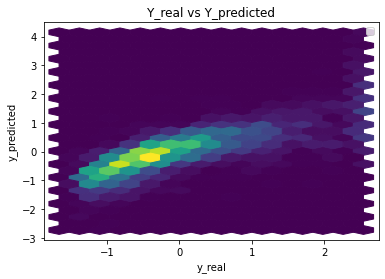

Performance Metrics
Mean Squared Error: 0.39293754731380526
Mean Absolute Error: 0.4674719625561494
Manhattan distance: 1929.724261431781
Euclidean distance: 40.274634639080055


Stats Model MAE 0.4674719625561494


In [5]:
coefficients , y_pred =statsModel.statsModel(X_train,y_train,X_test,y_test)
#Store MSE Value 
sb.glue("Coefficients",coefficients)
mae = mean_absolute_error(y_pred, y_test)
print("Stats Model MAE", mae)

# Catboost Model 

In [6]:
mae_cb = baselineModels.catboost(X_train,y_train,X_test,y_test)
#Store MAE Value
sb.glue("Catboost MAE",mae_cb)
print("Catboost MAE",mae_cb)

Learning rate set to 0.063766
0:	learn: 0.9632073	total: 48.7ms	remaining: 48.6s
1:	learn: 0.9315857	total: 50.9ms	remaining: 25.4s
2:	learn: 0.9018175	total: 53.1ms	remaining: 17.7s
3:	learn: 0.8747133	total: 55.2ms	remaining: 13.8s
4:	learn: 0.8486904	total: 57.2ms	remaining: 11.4s
5:	learn: 0.8252599	total: 59.2ms	remaining: 9.81s
6:	learn: 0.8029252	total: 61.2ms	remaining: 8.69s
7:	learn: 0.7824547	total: 63.2ms	remaining: 7.83s
8:	learn: 0.7641071	total: 65.3ms	remaining: 7.19s
9:	learn: 0.7469351	total: 67.4ms	remaining: 6.67s
10:	learn: 0.7311765	total: 69.6ms	remaining: 6.26s
11:	learn: 0.7161620	total: 71.7ms	remaining: 5.9s
12:	learn: 0.7033937	total: 73.8ms	remaining: 5.6s
13:	learn: 0.6886818	total: 75.9ms	remaining: 5.34s
14:	learn: 0.6770451	total: 78ms	remaining: 5.13s
15:	learn: 0.6659464	total: 80.2ms	remaining: 4.93s
16:	learn: 0.6561380	total: 82.7ms	remaining: 4.78s


17:	learn: 0.6461393	total: 85.4ms	remaining: 4.66s
18:	learn: 0.6378503	total: 87.5ms	remaining: 4.52s
19:	learn: 0.6283817	total: 89.9ms	remaining: 4.4s
20:	learn: 0.6207655	total: 92ms	remaining: 4.29s
21:	learn: 0.6130988	total: 94.2ms	remaining: 4.19s
22:	learn: 0.6050593	total: 96.3ms	remaining: 4.09s
23:	learn: 0.5990943	total: 98.3ms	remaining: 4s


24:	learn: 0.5926544	total: 101ms	remaining: 3.93s
25:	learn: 0.5870496	total: 103ms	remaining: 3.86s
26:	learn: 0.5815269	total: 105ms	remaining: 3.78s
27:	learn: 0.5759755	total: 107ms	remaining: 3.71s
28:	learn: 0.5696559	total: 109ms	remaining: 3.65s
29:	learn: 0.5631529	total: 111ms	remaining: 3.59s
30:	learn: 0.5596327	total: 113ms	remaining: 3.54s
31:	learn: 0.5555028	total: 115ms	remaining: 3.49s
32:	learn: 0.5513157	total: 117ms	remaining: 3.44s
33:	learn: 0.5483135	total: 119ms	remaining: 3.39s
34:	learn: 0.5437587	total: 121ms	remaining: 3.35s
35:	learn: 0.5407926	total: 124ms	remaining: 3.31s
36:	learn: 0.5376098	total: 125ms	remaining: 3.26s
37:	learn: 0.5338861	total: 128ms	remaining: 3.23s
38:	learn: 0.5302701	total: 130ms	remaining: 3.19s
39:	learn: 0.5275408	total: 132ms	remaining: 3.16s
40:	learn: 0.5244451	total: 134ms	remaining: 3.13s
41:	learn: 0.5221402	total: 136ms	remaining: 3.1s
42:	learn: 0.5191183	total: 138ms	remaining: 3.08s
43:	learn: 0.5175370	total: 140m

52:	learn: 0.4978247	total: 161ms	remaining: 2.87s
53:	learn: 0.4966158	total: 163ms	remaining: 2.86s
54:	learn: 0.4944550	total: 165ms	remaining: 2.84s
55:	learn: 0.4925068	total: 167ms	remaining: 2.82s
56:	learn: 0.4905068	total: 169ms	remaining: 2.8s
57:	learn: 0.4895706	total: 171ms	remaining: 2.78s
58:	learn: 0.4885917	total: 174ms	remaining: 2.77s
59:	learn: 0.4870994	total: 176ms	remaining: 2.75s
60:	learn: 0.4856432	total: 178ms	remaining: 2.73s
61:	learn: 0.4842026	total: 180ms	remaining: 2.72s
62:	learn: 0.4833394	total: 182ms	remaining: 2.7s
63:	learn: 0.4814130	total: 183ms	remaining: 2.68s
64:	learn: 0.4800245	total: 186ms	remaining: 2.67s
65:	learn: 0.4793272	total: 188ms	remaining: 2.66s
66:	learn: 0.4781797	total: 190ms	remaining: 2.64s
67:	learn: 0.4769979	total: 192ms	remaining: 2.63s
68:	learn: 0.4755620	total: 194ms	remaining: 2.62s
69:	learn: 0.4745162	total: 196ms	remaining: 2.6s
70:	learn: 0.4730883	total: 198ms	remaining: 2.59s
71:	learn: 0.4723086	total: 200ms	

93:	learn: 0.4555191	total: 246ms	remaining: 2.37s
94:	learn: 0.4549653	total: 248ms	remaining: 2.36s
95:	learn: 0.4542736	total: 250ms	remaining: 2.36s
96:	learn: 0.4536883	total: 253ms	remaining: 2.35s
97:	learn: 0.4528270	total: 255ms	remaining: 2.35s
98:	learn: 0.4522530	total: 257ms	remaining: 2.34s


99:	learn: 0.4515781	total: 260ms	remaining: 2.34s
100:	learn: 0.4506064	total: 262ms	remaining: 2.33s
101:	learn: 0.4500272	total: 264ms	remaining: 2.33s
102:	learn: 0.4490118	total: 266ms	remaining: 2.32s
103:	learn: 0.4483460	total: 269ms	remaining: 2.31s
104:	learn: 0.4476258	total: 271ms	remaining: 2.31s
105:	learn: 0.4472191	total: 273ms	remaining: 2.3s
106:	learn: 0.4468005	total: 275ms	remaining: 2.29s
107:	learn: 0.4461077	total: 277ms	remaining: 2.29s
108:	learn: 0.4454296	total: 279ms	remaining: 2.28s
109:	learn: 0.4447351	total: 281ms	remaining: 2.27s
110:	learn: 0.4443515	total: 283ms	remaining: 2.27s
111:	learn: 0.4438216	total: 285ms	remaining: 2.26s
112:	learn: 0.4433188	total: 287ms	remaining: 2.25s
113:	learn: 0.4428941	total: 289ms	remaining: 2.24s
114:	learn: 0.4421058	total: 291ms	remaining: 2.24s
115:	learn: 0.4417786	total: 293ms	remaining: 2.23s
116:	learn: 0.4414089	total: 295ms	remaining: 2.22s
117:	learn: 0.4407377	total: 297ms	remaining: 2.22s
118:	learn: 0.

129:	learn: 0.4346557	total: 322ms	remaining: 2.15s
130:	learn: 0.4342403	total: 324ms	remaining: 2.15s
131:	learn: 0.4337727	total: 326ms	remaining: 2.14s
132:	learn: 0.4331243	total: 328ms	remaining: 2.14s
133:	learn: 0.4327340	total: 330ms	remaining: 2.13s
134:	learn: 0.4323168	total: 332ms	remaining: 2.13s
135:	learn: 0.4318235	total: 334ms	remaining: 2.12s
136:	learn: 0.4312407	total: 336ms	remaining: 2.12s
137:	learn: 0.4305144	total: 338ms	remaining: 2.11s
138:	learn: 0.4300455	total: 340ms	remaining: 2.1s
139:	learn: 0.4297487	total: 342ms	remaining: 2.1s
140:	learn: 0.4294015	total: 344ms	remaining: 2.1s
141:	learn: 0.4288483	total: 346ms	remaining: 2.09s
142:	learn: 0.4284611	total: 348ms	remaining: 2.09s
143:	learn: 0.4279913	total: 350ms	remaining: 2.08s
144:	learn: 0.4274997	total: 352ms	remaining: 2.08s
145:	learn: 0.4270819	total: 354ms	remaining: 2.07s
146:	learn: 0.4268056	total: 357ms	remaining: 2.07s
147:	learn: 0.4264722	total: 359ms	remaining: 2.06s
148:	learn: 0.4

171:	learn: 0.4160140	total: 407ms	remaining: 1.96s
172:	learn: 0.4155865	total: 409ms	remaining: 1.96s
173:	learn: 0.4149457	total: 411ms	remaining: 1.95s
174:	learn: 0.4144664	total: 413ms	remaining: 1.95s
175:	learn: 0.4141653	total: 415ms	remaining: 1.94s
176:	learn: 0.4138617	total: 417ms	remaining: 1.94s


177:	learn: 0.4135418	total: 419ms	remaining: 1.94s
178:	learn: 0.4132249	total: 422ms	remaining: 1.93s
179:	learn: 0.4124901	total: 423ms	remaining: 1.93s
180:	learn: 0.4121029	total: 426ms	remaining: 1.93s
181:	learn: 0.4118234	total: 427ms	remaining: 1.92s
182:	learn: 0.4115654	total: 429ms	remaining: 1.92s
183:	learn: 0.4112297	total: 432ms	remaining: 1.91s
184:	learn: 0.4108759	total: 434ms	remaining: 1.91s
185:	learn: 0.4105162	total: 436ms	remaining: 1.91s
186:	learn: 0.4099728	total: 438ms	remaining: 1.9s
187:	learn: 0.4096753	total: 440ms	remaining: 1.9s
188:	learn: 0.4093084	total: 442ms	remaining: 1.89s
189:	learn: 0.4089919	total: 444ms	remaining: 1.89s
190:	learn: 0.4087596	total: 446ms	remaining: 1.89s
191:	learn: 0.4082487	total: 448ms	remaining: 1.89s
192:	learn: 0.4079607	total: 450ms	remaining: 1.88s
193:	learn: 0.4073358	total: 452ms	remaining: 1.88s
194:	learn: 0.4069955	total: 454ms	remaining: 1.87s
195:	learn: 0.4067053	total: 456ms	remaining: 1.87s
196:	learn: 0.

208:	learn: 0.4021095	total: 483ms	remaining: 1.83s
209:	learn: 0.4017891	total: 485ms	remaining: 1.82s
210:	learn: 0.4013865	total: 487ms	remaining: 1.82s
211:	learn: 0.4010958	total: 489ms	remaining: 1.82s
212:	learn: 0.4007146	total: 491ms	remaining: 1.81s
213:	learn: 0.4003936	total: 493ms	remaining: 1.81s
214:	learn: 0.4000039	total: 495ms	remaining: 1.81s
215:	learn: 0.3995745	total: 497ms	remaining: 1.8s
216:	learn: 0.3993868	total: 500ms	remaining: 1.8s
217:	learn: 0.3990334	total: 502ms	remaining: 1.8s
218:	learn: 0.3987638	total: 504ms	remaining: 1.8s
219:	learn: 0.3985096	total: 506ms	remaining: 1.79s
220:	learn: 0.3982709	total: 508ms	remaining: 1.79s
221:	learn: 0.3979381	total: 510ms	remaining: 1.79s
222:	learn: 0.3976321	total: 512ms	remaining: 1.78s
223:	learn: 0.3974609	total: 514ms	remaining: 1.78s
224:	learn: 0.3971794	total: 516ms	remaining: 1.78s
225:	learn: 0.3969697	total: 518ms	remaining: 1.77s
226:	learn: 0.3965064	total: 520ms	remaining: 1.77s
227:	learn: 0.39

249:	learn: 0.3898867	total: 570ms	remaining: 1.71s
250:	learn: 0.3896659	total: 572ms	remaining: 1.71s
251:	learn: 0.3894488	total: 574ms	remaining: 1.7s
252:	learn: 0.3891793	total: 576ms	remaining: 1.7s
253:	learn: 0.3888946	total: 578ms	remaining: 1.7s


254:	learn: 0.3887087	total: 580ms	remaining: 1.69s
255:	learn: 0.3884838	total: 582ms	remaining: 1.69s
256:	learn: 0.3882836	total: 584ms	remaining: 1.69s
257:	learn: 0.3880601	total: 586ms	remaining: 1.69s
258:	learn: 0.3877401	total: 588ms	remaining: 1.68s
259:	learn: 0.3875296	total: 591ms	remaining: 1.68s
260:	learn: 0.3872970	total: 593ms	remaining: 1.68s
261:	learn: 0.3870309	total: 595ms	remaining: 1.68s
262:	learn: 0.3868451	total: 597ms	remaining: 1.67s
263:	learn: 0.3865555	total: 599ms	remaining: 1.67s
264:	learn: 0.3862732	total: 601ms	remaining: 1.67s
265:	learn: 0.3859208	total: 603ms	remaining: 1.66s
266:	learn: 0.3857284	total: 605ms	remaining: 1.66s
267:	learn: 0.3853303	total: 607ms	remaining: 1.66s
268:	learn: 0.3850180	total: 609ms	remaining: 1.66s
269:	learn: 0.3848046	total: 611ms	remaining: 1.65s
270:	learn: 0.3845441	total: 613ms	remaining: 1.65s
271:	learn: 0.3843833	total: 615ms	remaining: 1.65s
272:	learn: 0.3840595	total: 617ms	remaining: 1.64s
273:	learn: 

285:	learn: 0.3816224	total: 644ms	remaining: 1.61s
286:	learn: 0.3812147	total: 646ms	remaining: 1.6s
287:	learn: 0.3810302	total: 648ms	remaining: 1.6s
288:	learn: 0.3807995	total: 650ms	remaining: 1.6s
289:	learn: 0.3806678	total: 652ms	remaining: 1.6s
290:	learn: 0.3804086	total: 654ms	remaining: 1.59s
291:	learn: 0.3801192	total: 656ms	remaining: 1.59s
292:	learn: 0.3798274	total: 658ms	remaining: 1.59s
293:	learn: 0.3796459	total: 661ms	remaining: 1.59s
294:	learn: 0.3794687	total: 663ms	remaining: 1.58s
295:	learn: 0.3793124	total: 665ms	remaining: 1.58s
296:	learn: 0.3790505	total: 667ms	remaining: 1.58s
297:	learn: 0.3785947	total: 669ms	remaining: 1.58s
298:	learn: 0.3783506	total: 671ms	remaining: 1.57s
299:	learn: 0.3779258	total: 674ms	remaining: 1.57s
300:	learn: 0.3777355	total: 676ms	remaining: 1.57s
301:	learn: 0.3775671	total: 678ms	remaining: 1.57s
302:	learn: 0.3773579	total: 680ms	remaining: 1.56s
303:	learn: 0.3770778	total: 682ms	remaining: 1.56s
304:	learn: 0.37

328:	learn: 0.3718492	total: 733ms	remaining: 1.49s
329:	learn: 0.3716191	total: 735ms	remaining: 1.49s
330:	learn: 0.3714874	total: 737ms	remaining: 1.49s
331:	learn: 0.3712705	total: 739ms	remaining: 1.49s


332:	learn: 0.3711164	total: 741ms	remaining: 1.48s
333:	learn: 0.3709137	total: 744ms	remaining: 1.48s
334:	learn: 0.3707289	total: 746ms	remaining: 1.48s
335:	learn: 0.3705819	total: 749ms	remaining: 1.48s
336:	learn: 0.3704504	total: 751ms	remaining: 1.48s
337:	learn: 0.3703202	total: 753ms	remaining: 1.48s
338:	learn: 0.3699451	total: 756ms	remaining: 1.47s
339:	learn: 0.3697095	total: 758ms	remaining: 1.47s
340:	learn: 0.3696066	total: 760ms	remaining: 1.47s
341:	learn: 0.3694245	total: 762ms	remaining: 1.47s
342:	learn: 0.3691947	total: 764ms	remaining: 1.46s
343:	learn: 0.3689885	total: 766ms	remaining: 1.46s
344:	learn: 0.3687991	total: 768ms	remaining: 1.46s
345:	learn: 0.3685836	total: 770ms	remaining: 1.46s
346:	learn: 0.3684032	total: 772ms	remaining: 1.45s
347:	learn: 0.3681397	total: 774ms	remaining: 1.45s
348:	learn: 0.3680189	total: 776ms	remaining: 1.45s
349:	learn: 0.3677892	total: 778ms	remaining: 1.44s
350:	learn: 0.3676230	total: 780ms	remaining: 1.44s
351:	learn: 

363:	learn: 0.3654793	total: 808ms	remaining: 1.41s
364:	learn: 0.3653573	total: 810ms	remaining: 1.41s
365:	learn: 0.3652495	total: 812ms	remaining: 1.41s
366:	learn: 0.3650814	total: 814ms	remaining: 1.4s
367:	learn: 0.3648512	total: 816ms	remaining: 1.4s
368:	learn: 0.3646442	total: 818ms	remaining: 1.4s
369:	learn: 0.3644807	total: 820ms	remaining: 1.4s
370:	learn: 0.3643001	total: 822ms	remaining: 1.39s
371:	learn: 0.3641002	total: 824ms	remaining: 1.39s
372:	learn: 0.3639607	total: 826ms	remaining: 1.39s
373:	learn: 0.3637950	total: 829ms	remaining: 1.39s
374:	learn: 0.3636098	total: 831ms	remaining: 1.39s
375:	learn: 0.3634766	total: 833ms	remaining: 1.38s
376:	learn: 0.3633259	total: 835ms	remaining: 1.38s
377:	learn: 0.3630705	total: 839ms	remaining: 1.38s
378:	learn: 0.3628885	total: 841ms	remaining: 1.38s
379:	learn: 0.3627106	total: 843ms	remaining: 1.38s
380:	learn: 0.3625797	total: 845ms	remaining: 1.37s
381:	learn: 0.3624020	total: 848ms	remaining: 1.37s
382:	learn: 0.36

405:	learn: 0.3585136	total: 896ms	remaining: 1.31s
406:	learn: 0.3583134	total: 899ms	remaining: 1.31s
407:	learn: 0.3582049	total: 901ms	remaining: 1.31s
408:	learn: 0.3580802	total: 902ms	remaining: 1.3s


409:	learn: 0.3579010	total: 906ms	remaining: 1.3s
410:	learn: 0.3576272	total: 908ms	remaining: 1.3s
411:	learn: 0.3574639	total: 910ms	remaining: 1.3s
412:	learn: 0.3573191	total: 912ms	remaining: 1.3s
413:	learn: 0.3571550	total: 914ms	remaining: 1.29s
414:	learn: 0.3570638	total: 916ms	remaining: 1.29s
415:	learn: 0.3568935	total: 919ms	remaining: 1.29s
416:	learn: 0.3567268	total: 921ms	remaining: 1.29s
417:	learn: 0.3566224	total: 923ms	remaining: 1.28s
418:	learn: 0.3564682	total: 925ms	remaining: 1.28s
419:	learn: 0.3562069	total: 927ms	remaining: 1.28s
420:	learn: 0.3560498	total: 929ms	remaining: 1.28s
421:	learn: 0.3558794	total: 931ms	remaining: 1.27s
422:	learn: 0.3557630	total: 933ms	remaining: 1.27s
423:	learn: 0.3555823	total: 935ms	remaining: 1.27s
424:	learn: 0.3554203	total: 937ms	remaining: 1.27s
425:	learn: 0.3552437	total: 939ms	remaining: 1.26s
426:	learn: 0.3550802	total: 942ms	remaining: 1.26s
427:	learn: 0.3548560	total: 944ms	remaining: 1.26s
428:	learn: 0.35

441:	learn: 0.3525785	total: 973ms	remaining: 1.23s
442:	learn: 0.3524932	total: 975ms	remaining: 1.23s
443:	learn: 0.3524159	total: 977ms	remaining: 1.22s
444:	learn: 0.3522921	total: 979ms	remaining: 1.22s
445:	learn: 0.3521254	total: 981ms	remaining: 1.22s
446:	learn: 0.3520497	total: 983ms	remaining: 1.22s
447:	learn: 0.3519062	total: 985ms	remaining: 1.21s
448:	learn: 0.3517554	total: 987ms	remaining: 1.21s
449:	learn: 0.3516093	total: 989ms	remaining: 1.21s
450:	learn: 0.3514661	total: 991ms	remaining: 1.21s
451:	learn: 0.3513185	total: 993ms	remaining: 1.2s
452:	learn: 0.3512183	total: 995ms	remaining: 1.2s
453:	learn: 0.3510306	total: 997ms	remaining: 1.2s
454:	learn: 0.3508990	total: 999ms	remaining: 1.2s
455:	learn: 0.3507648	total: 1s	remaining: 1.19s
456:	learn: 0.3506069	total: 1s	remaining: 1.19s
457:	learn: 0.3504663	total: 1s	remaining: 1.19s
458:	learn: 0.3503289	total: 1.01s	remaining: 1.19s
459:	learn: 0.3502248	total: 1.01s	remaining: 1.19s
460:	learn: 0.3501036	tot

483:	learn: 0.3470591	total: 1.06s	remaining: 1.13s
484:	learn: 0.3469258	total: 1.06s	remaining: 1.13s
485:	learn: 0.3467947	total: 1.06s	remaining: 1.13s
486:	learn: 0.3466658	total: 1.07s	remaining: 1.12s
487:	learn: 0.3466033	total: 1.07s	remaining: 1.12s


488:	learn: 0.3465023	total: 1.07s	remaining: 1.12s
489:	learn: 0.3463937	total: 1.07s	remaining: 1.12s
490:	learn: 0.3462674	total: 1.07s	remaining: 1.11s
491:	learn: 0.3461282	total: 1.08s	remaining: 1.11s
492:	learn: 0.3459500	total: 1.08s	remaining: 1.11s
493:	learn: 0.3457940	total: 1.08s	remaining: 1.11s
494:	learn: 0.3457266	total: 1.08s	remaining: 1.1s
495:	learn: 0.3456207	total: 1.08s	remaining: 1.1s
496:	learn: 0.3454928	total: 1.09s	remaining: 1.1s
497:	learn: 0.3454341	total: 1.09s	remaining: 1.1s
498:	learn: 0.3453023	total: 1.09s	remaining: 1.09s
499:	learn: 0.3451798	total: 1.09s	remaining: 1.09s
500:	learn: 0.3450267	total: 1.09s	remaining: 1.09s
501:	learn: 0.3447882	total: 1.1s	remaining: 1.09s
502:	learn: 0.3446165	total: 1.1s	remaining: 1.09s
503:	learn: 0.3444545	total: 1.1s	remaining: 1.08s
504:	learn: 0.3443059	total: 1.1s	remaining: 1.08s
505:	learn: 0.3440841	total: 1.1s	remaining: 1.08s
506:	learn: 0.3439305	total: 1.11s	remaining: 1.08s
507:	learn: 0.3437793

520:	learn: 0.3420107	total: 1.14s	remaining: 1.04s
521:	learn: 0.3418643	total: 1.14s	remaining: 1.04s
522:	learn: 0.3417079	total: 1.14s	remaining: 1.04s
523:	learn: 0.3415848	total: 1.15s	remaining: 1.04s
524:	learn: 0.3414812	total: 1.15s	remaining: 1.04s
525:	learn: 0.3413770	total: 1.15s	remaining: 1.04s
526:	learn: 0.3412400	total: 1.15s	remaining: 1.03s
527:	learn: 0.3410965	total: 1.15s	remaining: 1.03s
528:	learn: 0.3410274	total: 1.16s	remaining: 1.03s
529:	learn: 0.3408625	total: 1.16s	remaining: 1.03s
530:	learn: 0.3407892	total: 1.16s	remaining: 1.02s
531:	learn: 0.3406656	total: 1.16s	remaining: 1.02s
532:	learn: 0.3405798	total: 1.16s	remaining: 1.02s
533:	learn: 0.3403918	total: 1.17s	remaining: 1.02s
534:	learn: 0.3403049	total: 1.17s	remaining: 1.02s
535:	learn: 0.3400423	total: 1.17s	remaining: 1.01s
536:	learn: 0.3399090	total: 1.17s	remaining: 1.01s
537:	learn: 0.3398078	total: 1.18s	remaining: 1.01s
538:	learn: 0.3395868	total: 1.18s	remaining: 1.01s
539:	learn: 

561:	learn: 0.3366102	total: 1.23s	remaining: 956ms
562:	learn: 0.3364416	total: 1.23s	remaining: 954ms
563:	learn: 0.3363586	total: 1.23s	remaining: 952ms
564:	learn: 0.3362570	total: 1.23s	remaining: 950ms


565:	learn: 0.3360737	total: 1.24s	remaining: 948ms
566:	learn: 0.3359361	total: 1.24s	remaining: 946ms
567:	learn: 0.3357704	total: 1.24s	remaining: 944ms
568:	learn: 0.3357191	total: 1.24s	remaining: 941ms
569:	learn: 0.3356109	total: 1.25s	remaining: 939ms
570:	learn: 0.3354282	total: 1.25s	remaining: 937ms
571:	learn: 0.3353072	total: 1.25s	remaining: 935ms
572:	learn: 0.3352246	total: 1.25s	remaining: 933ms
573:	learn: 0.3350784	total: 1.25s	remaining: 930ms
574:	learn: 0.3348936	total: 1.25s	remaining: 928ms
575:	learn: 0.3347792	total: 1.26s	remaining: 926ms
576:	learn: 0.3345967	total: 1.26s	remaining: 923ms
577:	learn: 0.3345228	total: 1.26s	remaining: 921ms
578:	learn: 0.3343981	total: 1.26s	remaining: 919ms
579:	learn: 0.3342687	total: 1.26s	remaining: 917ms
580:	learn: 0.3341693	total: 1.27s	remaining: 914ms
581:	learn: 0.3340469	total: 1.27s	remaining: 912ms
582:	learn: 0.3339389	total: 1.27s	remaining: 910ms
583:	learn: 0.3337052	total: 1.27s	remaining: 908ms
584:	learn: 

596:	learn: 0.3322051	total: 1.3s	remaining: 879ms
597:	learn: 0.3321228	total: 1.3s	remaining: 877ms
598:	learn: 0.3320237	total: 1.3s	remaining: 874ms
599:	learn: 0.3319444	total: 1.31s	remaining: 872ms
600:	learn: 0.3318532	total: 1.31s	remaining: 870ms
601:	learn: 0.3317878	total: 1.31s	remaining: 867ms
602:	learn: 0.3316462	total: 1.31s	remaining: 865ms
603:	learn: 0.3315416	total: 1.31s	remaining: 863ms
604:	learn: 0.3314814	total: 1.32s	remaining: 860ms
605:	learn: 0.3313716	total: 1.32s	remaining: 858ms
606:	learn: 0.3311508	total: 1.32s	remaining: 856ms
607:	learn: 0.3310160	total: 1.32s	remaining: 854ms
608:	learn: 0.3309225	total: 1.33s	remaining: 851ms
609:	learn: 0.3308414	total: 1.33s	remaining: 849ms
610:	learn: 0.3307427	total: 1.33s	remaining: 847ms
611:	learn: 0.3306610	total: 1.33s	remaining: 844ms
612:	learn: 0.3305192	total: 1.33s	remaining: 842ms
613:	learn: 0.3304058	total: 1.33s	remaining: 840ms
614:	learn: 0.3302048	total: 1.34s	remaining: 837ms
615:	learn: 0.3

637:	learn: 0.3275444	total: 1.39s	remaining: 787ms
638:	learn: 0.3274122	total: 1.39s	remaining: 785ms
639:	learn: 0.3272560	total: 1.39s	remaining: 783ms
640:	learn: 0.3271681	total: 1.39s	remaining: 781ms
641:	learn: 0.3270815	total: 1.4s	remaining: 778ms


642:	learn: 0.3270327	total: 1.4s	remaining: 776ms
643:	learn: 0.3269122	total: 1.4s	remaining: 774ms
644:	learn: 0.3267974	total: 1.4s	remaining: 772ms
645:	learn: 0.3266879	total: 1.41s	remaining: 770ms
646:	learn: 0.3266484	total: 1.41s	remaining: 768ms
647:	learn: 0.3265649	total: 1.41s	remaining: 766ms
648:	learn: 0.3264557	total: 1.41s	remaining: 764ms
649:	learn: 0.3263056	total: 1.41s	remaining: 762ms
650:	learn: 0.3262036	total: 1.42s	remaining: 760ms
651:	learn: 0.3260624	total: 1.42s	remaining: 757ms
652:	learn: 0.3259255	total: 1.42s	remaining: 755ms
653:	learn: 0.3257543	total: 1.42s	remaining: 753ms
654:	learn: 0.3256878	total: 1.43s	remaining: 751ms
655:	learn: 0.3256370	total: 1.43s	remaining: 748ms
656:	learn: 0.3255328	total: 1.43s	remaining: 746ms
657:	learn: 0.3253990	total: 1.43s	remaining: 744ms
658:	learn: 0.3252857	total: 1.43s	remaining: 742ms
659:	learn: 0.3251761	total: 1.44s	remaining: 740ms
660:	learn: 0.3250526	total: 1.44s	remaining: 737ms
661:	learn: 0.3

673:	learn: 0.3238134	total: 1.47s	remaining: 709ms
674:	learn: 0.3237428	total: 1.47s	remaining: 707ms
675:	learn: 0.3236332	total: 1.47s	remaining: 704ms
676:	learn: 0.3235338	total: 1.47s	remaining: 702ms
677:	learn: 0.3234343	total: 1.47s	remaining: 700ms
678:	learn: 0.3232834	total: 1.48s	remaining: 698ms
679:	learn: 0.3231353	total: 1.48s	remaining: 696ms
680:	learn: 0.3230128	total: 1.48s	remaining: 694ms
681:	learn: 0.3229156	total: 1.48s	remaining: 691ms
682:	learn: 0.3227858	total: 1.48s	remaining: 689ms
683:	learn: 0.3226715	total: 1.49s	remaining: 687ms
684:	learn: 0.3225600	total: 1.49s	remaining: 685ms
685:	learn: 0.3224909	total: 1.49s	remaining: 682ms
686:	learn: 0.3223698	total: 1.49s	remaining: 680ms
687:	learn: 0.3223012	total: 1.5s	remaining: 678ms
688:	learn: 0.3222114	total: 1.5s	remaining: 676ms
689:	learn: 0.3221146	total: 1.5s	remaining: 674ms
690:	learn: 0.3220053	total: 1.5s	remaining: 671ms
691:	learn: 0.3218646	total: 1.5s	remaining: 669ms
692:	learn: 0.321

714:	learn: 0.3190862	total: 1.55s	remaining: 619ms
715:	learn: 0.3189954	total: 1.55s	remaining: 617ms
716:	learn: 0.3189500	total: 1.56s	remaining: 614ms
717:	learn: 0.3188566	total: 1.56s	remaining: 612ms
718:	learn: 0.3187402	total: 1.56s	remaining: 610ms


719:	learn: 0.3186199	total: 1.56s	remaining: 608ms
720:	learn: 0.3184855	total: 1.56s	remaining: 606ms
721:	learn: 0.3183915	total: 1.57s	remaining: 603ms
722:	learn: 0.3182950	total: 1.57s	remaining: 601ms
723:	learn: 0.3181796	total: 1.57s	remaining: 599ms
724:	learn: 0.3181262	total: 1.57s	remaining: 597ms
725:	learn: 0.3180154	total: 1.57s	remaining: 595ms
726:	learn: 0.3178757	total: 1.58s	remaining: 592ms
727:	learn: 0.3178046	total: 1.58s	remaining: 590ms
728:	learn: 0.3177029	total: 1.58s	remaining: 588ms
729:	learn: 0.3175800	total: 1.58s	remaining: 586ms
730:	learn: 0.3174704	total: 1.58s	remaining: 583ms
731:	learn: 0.3173105	total: 1.59s	remaining: 581ms
732:	learn: 0.3172131	total: 1.59s	remaining: 579ms
733:	learn: 0.3171078	total: 1.59s	remaining: 577ms
734:	learn: 0.3170005	total: 1.59s	remaining: 575ms
735:	learn: 0.3168645	total: 1.59s	remaining: 572ms
736:	learn: 0.3167591	total: 1.6s	remaining: 570ms
737:	learn: 0.3167034	total: 1.6s	remaining: 568ms
738:	learn: 0.

751:	learn: 0.3153846	total: 1.63s	remaining: 537ms
752:	learn: 0.3153152	total: 1.63s	remaining: 535ms
753:	learn: 0.3152509	total: 1.63s	remaining: 533ms
754:	learn: 0.3151874	total: 1.63s	remaining: 530ms
755:	learn: 0.3151459	total: 1.64s	remaining: 528ms
756:	learn: 0.3150603	total: 1.64s	remaining: 526ms
757:	learn: 0.3149780	total: 1.64s	remaining: 524ms
758:	learn: 0.3148784	total: 1.64s	remaining: 522ms
759:	learn: 0.3147976	total: 1.64s	remaining: 519ms
760:	learn: 0.3147284	total: 1.65s	remaining: 517ms
761:	learn: 0.3146830	total: 1.65s	remaining: 515ms
762:	learn: 0.3146013	total: 1.65s	remaining: 513ms
763:	learn: 0.3144885	total: 1.65s	remaining: 511ms
764:	learn: 0.3144148	total: 1.66s	remaining: 508ms
765:	learn: 0.3143298	total: 1.66s	remaining: 506ms
766:	learn: 0.3142189	total: 1.66s	remaining: 504ms
767:	learn: 0.3141207	total: 1.66s	remaining: 502ms
768:	learn: 0.3140493	total: 1.66s	remaining: 500ms
769:	learn: 0.3139469	total: 1.67s	remaining: 498ms
770:	learn: 

791:	learn: 0.3118702	total: 1.71s	remaining: 450ms
792:	learn: 0.3117609	total: 1.72s	remaining: 448ms
793:	learn: 0.3116711	total: 1.72s	remaining: 446ms
794:	learn: 0.3116039	total: 1.72s	remaining: 443ms
795:	learn: 0.3114824	total: 1.72s	remaining: 441ms


796:	learn: 0.3114260	total: 1.73s	remaining: 439ms
797:	learn: 0.3113518	total: 1.73s	remaining: 437ms
798:	learn: 0.3112626	total: 1.73s	remaining: 435ms
799:	learn: 0.3111910	total: 1.73s	remaining: 433ms
800:	learn: 0.3111563	total: 1.73s	remaining: 431ms
801:	learn: 0.3110819	total: 1.74s	remaining: 429ms
802:	learn: 0.3110259	total: 1.74s	remaining: 426ms
803:	learn: 0.3109208	total: 1.74s	remaining: 424ms
804:	learn: 0.3108683	total: 1.74s	remaining: 422ms
805:	learn: 0.3108010	total: 1.74s	remaining: 420ms
806:	learn: 0.3107402	total: 1.75s	remaining: 418ms
807:	learn: 0.3106836	total: 1.75s	remaining: 415ms
808:	learn: 0.3106154	total: 1.75s	remaining: 413ms
809:	learn: 0.3105510	total: 1.75s	remaining: 411ms
810:	learn: 0.3104581	total: 1.75s	remaining: 409ms
811:	learn: 0.3103555	total: 1.75s	remaining: 407ms
812:	learn: 0.3102828	total: 1.76s	remaining: 404ms
813:	learn: 0.3102150	total: 1.76s	remaining: 402ms
814:	learn: 0.3101269	total: 1.76s	remaining: 400ms
815:	learn: 

827:	learn: 0.3088961	total: 1.79s	remaining: 372ms
828:	learn: 0.3088107	total: 1.79s	remaining: 370ms
829:	learn: 0.3087479	total: 1.79s	remaining: 368ms
830:	learn: 0.3086736	total: 1.8s	remaining: 365ms
831:	learn: 0.3086161	total: 1.8s	remaining: 363ms
832:	learn: 0.3085161	total: 1.8s	remaining: 361ms
833:	learn: 0.3083969	total: 1.8s	remaining: 359ms
834:	learn: 0.3083189	total: 1.8s	remaining: 357ms
835:	learn: 0.3082860	total: 1.81s	remaining: 355ms
836:	learn: 0.3082117	total: 1.81s	remaining: 352ms
837:	learn: 0.3081151	total: 1.81s	remaining: 350ms
838:	learn: 0.3080360	total: 1.81s	remaining: 348ms
839:	learn: 0.3079200	total: 1.81s	remaining: 346ms
840:	learn: 0.3078426	total: 1.82s	remaining: 344ms
841:	learn: 0.3077387	total: 1.82s	remaining: 341ms
842:	learn: 0.3076696	total: 1.82s	remaining: 339ms
843:	learn: 0.3075438	total: 1.82s	remaining: 337ms
844:	learn: 0.3074764	total: 1.83s	remaining: 335ms
845:	learn: 0.3073621	total: 1.83s	remaining: 333ms
846:	learn: 0.307

868:	learn: 0.3055377	total: 1.88s	remaining: 283ms
869:	learn: 0.3054486	total: 1.88s	remaining: 281ms
870:	learn: 0.3053386	total: 1.88s	remaining: 279ms
871:	learn: 0.3052632	total: 1.88s	remaining: 277ms
872:	learn: 0.3051810	total: 1.89s	remaining: 274ms


873:	learn: 0.3051216	total: 1.89s	remaining: 272ms
874:	learn: 0.3050096	total: 1.89s	remaining: 270ms
875:	learn: 0.3049625	total: 1.89s	remaining: 268ms
876:	learn: 0.3048868	total: 1.9s	remaining: 266ms
877:	learn: 0.3048262	total: 1.9s	remaining: 264ms
878:	learn: 0.3047070	total: 1.9s	remaining: 261ms
879:	learn: 0.3046309	total: 1.9s	remaining: 259ms
880:	learn: 0.3045241	total: 1.9s	remaining: 257ms
881:	learn: 0.3044467	total: 1.91s	remaining: 255ms
882:	learn: 0.3043789	total: 1.91s	remaining: 253ms
883:	learn: 0.3042679	total: 1.91s	remaining: 251ms
884:	learn: 0.3042203	total: 1.91s	remaining: 249ms
885:	learn: 0.3040701	total: 1.91s	remaining: 246ms
886:	learn: 0.3039829	total: 1.92s	remaining: 244ms
887:	learn: 0.3039218	total: 1.92s	remaining: 242ms
888:	learn: 0.3038834	total: 1.92s	remaining: 240ms
889:	learn: 0.3037679	total: 1.92s	remaining: 238ms
890:	learn: 0.3036948	total: 1.93s	remaining: 236ms
891:	learn: 0.3036119	total: 1.93s	remaining: 233ms
892:	learn: 0.303

903:	learn: 0.3025034	total: 1.95s	remaining: 208ms
904:	learn: 0.3024224	total: 1.96s	remaining: 205ms
905:	learn: 0.3023280	total: 1.96s	remaining: 203ms
906:	learn: 0.3022724	total: 1.96s	remaining: 201ms
907:	learn: 0.3022067	total: 1.96s	remaining: 199ms
908:	learn: 0.3021480	total: 1.97s	remaining: 197ms
909:	learn: 0.3020685	total: 1.97s	remaining: 195ms
910:	learn: 0.3019775	total: 1.97s	remaining: 192ms
911:	learn: 0.3018769	total: 1.97s	remaining: 190ms
912:	learn: 0.3017531	total: 1.97s	remaining: 188ms
913:	learn: 0.3016760	total: 1.98s	remaining: 186ms
914:	learn: 0.3016110	total: 1.98s	remaining: 184ms
915:	learn: 0.3015277	total: 1.98s	remaining: 182ms
916:	learn: 0.3014497	total: 1.98s	remaining: 179ms
917:	learn: 0.3013817	total: 1.99s	remaining: 177ms
918:	learn: 0.3012465	total: 1.99s	remaining: 175ms
919:	learn: 0.3011200	total: 1.99s	remaining: 173ms
920:	learn: 0.3010330	total: 1.99s	remaining: 171ms
921:	learn: 0.3009652	total: 1.99s	remaining: 169ms
922:	learn: 

944:	learn: 0.2991095	total: 2.04s	remaining: 119ms
945:	learn: 0.2990341	total: 2.04s	remaining: 117ms
946:	learn: 0.2989766	total: 2.04s	remaining: 114ms
947:	learn: 0.2989446	total: 2.05s	remaining: 112ms
948:	learn: 0.2988631	total: 2.05s	remaining: 110ms


949:	learn: 0.2988241	total: 2.05s	remaining: 108ms
950:	learn: 0.2987579	total: 2.06s	remaining: 106ms
951:	learn: 0.2986884	total: 2.06s	remaining: 104ms
952:	learn: 0.2986170	total: 2.06s	remaining: 102ms
953:	learn: 0.2985143	total: 2.06s	remaining: 99.4ms
954:	learn: 0.2984458	total: 2.06s	remaining: 97.2ms
955:	learn: 0.2983251	total: 2.06s	remaining: 95ms
956:	learn: 0.2982473	total: 2.07s	remaining: 92.9ms
957:	learn: 0.2981691	total: 2.07s	remaining: 90.7ms
958:	learn: 0.2981147	total: 2.07s	remaining: 88.5ms
959:	learn: 0.2980398	total: 2.07s	remaining: 86.4ms
960:	learn: 0.2979059	total: 2.08s	remaining: 84.2ms
961:	learn: 0.2978542	total: 2.08s	remaining: 82ms
962:	learn: 0.2977484	total: 2.08s	remaining: 79.9ms
963:	learn: 0.2976883	total: 2.08s	remaining: 77.7ms
964:	learn: 0.2976124	total: 2.08s	remaining: 75.6ms
965:	learn: 0.2974911	total: 2.08s	remaining: 73.4ms
966:	learn: 0.2974302	total: 2.09s	remaining: 71.2ms
967:	learn: 0.2974002	total: 2.09s	remaining: 69.1ms
9

980:	learn: 0.2964539	total: 2.12s	remaining: 41ms
981:	learn: 0.2963933	total: 2.12s	remaining: 38.8ms
982:	learn: 0.2963315	total: 2.12s	remaining: 36.7ms
983:	learn: 0.2962042	total: 2.12s	remaining: 34.5ms
984:	learn: 0.2961514	total: 2.12s	remaining: 32.4ms
985:	learn: 0.2960516	total: 2.13s	remaining: 30.2ms
986:	learn: 0.2959679	total: 2.13s	remaining: 28ms
987:	learn: 0.2958528	total: 2.13s	remaining: 25.9ms
988:	learn: 0.2957768	total: 2.13s	remaining: 23.7ms
989:	learn: 0.2957106	total: 2.13s	remaining: 21.6ms
990:	learn: 0.2956470	total: 2.14s	remaining: 19.4ms
991:	learn: 0.2955727	total: 2.14s	remaining: 17.3ms
992:	learn: 0.2954969	total: 2.14s	remaining: 15.1ms
993:	learn: 0.2954475	total: 2.14s	remaining: 12.9ms
994:	learn: 0.2953672	total: 2.15s	remaining: 10.8ms
995:	learn: 0.2953251	total: 2.15s	remaining: 8.62ms
996:	learn: 0.2952535	total: 2.15s	remaining: 6.47ms
997:	learn: 0.2951853	total: 2.15s	remaining: 4.31ms
998:	learn: 0.2950851	total: 2.15s	remaining: 2.16

Catboost MAE 0.254006933705406


# TabNet Regressor

In [7]:
n_epochs = 500
batch_size = 256

Device used : cuda


epoch 0  | loss: 1.79254 | train_mse: 1.14317 | train_mae: 0.75265 |  0:00:02s


epoch 1  | loss: 0.98566 | train_mse: 1.98881 | train_mae: 0.67233 |  0:00:04s


epoch 2  | loss: 0.79161 | train_mse: 1.63627 | train_mae: 0.6277  |  0:00:07s


epoch 3  | loss: 0.66619 | train_mse: 0.66759 | train_mae: 0.56742 |  0:00:09s


epoch 4  | loss: 0.57338 | train_mse: 0.77154 | train_mae: 0.53542 |  0:00:11s


epoch 5  | loss: 0.51222 | train_mse: 0.66931 | train_mae: 0.51552 |  0:00:13s


epoch 6  | loss: 0.48451 | train_mse: 0.56869 | train_mae: 0.49634 |  0:00:15s


epoch 7  | loss: 0.45319 | train_mse: 0.50134 | train_mae: 0.48584 |  0:00:18s


epoch 8  | loss: 0.43204 | train_mse: 0.51408 | train_mae: 0.47785 |  0:00:20s


epoch 9  | loss: 0.41069 | train_mse: 0.46812 | train_mae: 0.47323 |  0:00:22s


epoch 10 | loss: 0.39914 | train_mse: 0.44937 | train_mae: 0.45929 |  0:00:24s


epoch 11 | loss: 0.38188 | train_mse: 0.44419 | train_mae: 0.45852 |  0:00:26s


epoch 12 | loss: 0.36766 | train_mse: 0.40313 | train_mae: 0.44585 |  0:00:28s


epoch 13 | loss: 0.35311 | train_mse: 0.41318 | train_mae: 0.44333 |  0:00:31s


epoch 14 | loss: 0.35102 | train_mse: 0.42526 | train_mae: 0.44226 |  0:00:33s


epoch 15 | loss: 0.34147 | train_mse: 0.42128 | train_mae: 0.44679 |  0:00:35s


epoch 16 | loss: 0.33217 | train_mse: 0.40002 | train_mae: 0.43783 |  0:00:37s


epoch 17 | loss: 0.33168 | train_mse: 0.44371 | train_mae: 0.43411 |  0:00:39s


epoch 18 | loss: 0.33431 | train_mse: 0.41448 | train_mae: 0.43133 |  0:00:41s


epoch 19 | loss: 0.32489 | train_mse: 0.40702 | train_mae: 0.4331  |  0:00:44s


epoch 20 | loss: 0.31427 | train_mse: 0.39795 | train_mae: 0.41955 |  0:00:46s


epoch 21 | loss: 0.31576 | train_mse: 0.42528 | train_mae: 0.42694 |  0:00:48s


epoch 22 | loss: 0.31576 | train_mse: 0.42591 | train_mae: 0.42339 |  0:00:50s


epoch 23 | loss: 0.31347 | train_mse: 0.40947 | train_mae: 0.42009 |  0:00:53s


epoch 24 | loss: 0.30501 | train_mse: 0.40472 | train_mae: 0.42058 |  0:00:55s


epoch 25 | loss: 0.30924 | train_mse: 0.40807 | train_mae: 0.42462 |  0:00:57s


epoch 26 | loss: 0.30585 | train_mse: 0.4047  | train_mae: 0.41975 |  0:00:59s


epoch 27 | loss: 0.30242 | train_mse: 0.40537 | train_mae: 0.42365 |  0:01:01s


epoch 28 | loss: 0.29957 | train_mse: 0.37531 | train_mae: 0.41146 |  0:01:04s


epoch 29 | loss: 0.29653 | train_mse: 0.37366 | train_mae: 0.41127 |  0:01:06s


epoch 30 | loss: 0.29384 | train_mse: 0.36389 | train_mae: 0.40764 |  0:01:08s


epoch 31 | loss: 0.28847 | train_mse: 0.36612 | train_mae: 0.40663 |  0:01:10s


epoch 32 | loss: 0.28601 | train_mse: 0.37152 | train_mae: 0.40848 |  0:01:12s


epoch 33 | loss: 0.28334 | train_mse: 0.36401 | train_mae: 0.4084  |  0:01:14s


epoch 34 | loss: 0.28707 | train_mse: 0.48117 | train_mae: 0.40977 |  0:01:17s


epoch 35 | loss: 0.27898 | train_mse: 0.83684 | train_mae: 0.40723 |  0:01:19s


epoch 36 | loss: 0.28569 | train_mse: 0.37973 | train_mae: 0.40747 |  0:01:21s


epoch 37 | loss: 0.28521 | train_mse: 0.35868 | train_mae: 0.40595 |  0:01:23s


epoch 38 | loss: 0.2816  | train_mse: 0.36654 | train_mae: 0.40869 |  0:01:25s


epoch 39 | loss: 0.27647 | train_mse: 0.36871 | train_mae: 0.40723 |  0:01:27s


epoch 40 | loss: 0.27212 | train_mse: 0.36493 | train_mae: 0.40105 |  0:01:29s


epoch 41 | loss: 0.27208 | train_mse: 0.36547 | train_mae: 0.40149 |  0:01:32s


epoch 42 | loss: 0.27314 | train_mse: 0.39624 | train_mae: 0.40152 |  0:01:34s


epoch 43 | loss: 0.268   | train_mse: 0.37355 | train_mae: 0.40116 |  0:01:36s


epoch 44 | loss: 0.26338 | train_mse: 0.38322 | train_mae: 0.39746 |  0:01:38s


epoch 45 | loss: 0.26832 | train_mse: 0.36934 | train_mae: 0.39582 |  0:01:40s


epoch 46 | loss: 0.26897 | train_mse: 0.37518 | train_mae: 0.39873 |  0:01:42s


epoch 47 | loss: 0.26422 | train_mse: 0.36935 | train_mae: 0.39234 |  0:01:44s


epoch 48 | loss: 0.26208 | train_mse: 0.37645 | train_mae: 0.4033  |  0:01:46s


epoch 49 | loss: 0.26431 | train_mse: 0.3695  | train_mae: 0.39714 |  0:01:49s


epoch 50 | loss: 0.2597  | train_mse: 0.36391 | train_mae: 0.39705 |  0:01:51s


epoch 51 | loss: 0.25763 | train_mse: 0.36248 | train_mae: 0.39108 |  0:01:53s


epoch 52 | loss: 0.26048 | train_mse: 0.37237 | train_mae: 0.39213 |  0:01:55s


epoch 53 | loss: 0.25879 | train_mse: 0.39638 | train_mae: 0.40128 |  0:01:57s


epoch 54 | loss: 0.26003 | train_mse: 0.35355 | train_mae: 0.39259 |  0:01:59s


epoch 55 | loss: 0.25761 | train_mse: 0.35811 | train_mae: 0.38935 |  0:02:01s


epoch 56 | loss: 0.25413 | train_mse: 0.35437 | train_mae: 0.38965 |  0:02:04s


epoch 57 | loss: 0.25788 | train_mse: 0.37616 | train_mae: 0.39249 |  0:02:06s


epoch 58 | loss: 0.25558 | train_mse: 0.38795 | train_mae: 0.39585 |  0:02:08s


epoch 59 | loss: 0.25625 | train_mse: 0.3682  | train_mae: 0.39525 |  0:02:10s


epoch 60 | loss: 0.25465 | train_mse: 0.36881 | train_mae: 0.39413 |  0:02:12s


epoch 61 | loss: 0.25844 | train_mse: 0.35816 | train_mae: 0.39142 |  0:02:14s


epoch 62 | loss: 0.25297 | train_mse: 0.33709 | train_mae: 0.38872 |  0:02:17s


epoch 63 | loss: 0.24885 | train_mse: 0.34286 | train_mae: 0.39206 |  0:02:19s


epoch 64 | loss: 0.25528 | train_mse: 0.3537  | train_mae: 0.38481 |  0:02:21s


epoch 65 | loss: 0.24786 | train_mse: 0.48881 | train_mae: 0.3919  |  0:02:23s


epoch 66 | loss: 0.25246 | train_mse: 0.3323  | train_mae: 0.38671 |  0:02:25s


epoch 67 | loss: 0.25243 | train_mse: 0.34233 | train_mae: 0.38609 |  0:02:27s


epoch 68 | loss: 0.25358 | train_mse: 0.33849 | train_mae: 0.3892  |  0:02:30s


epoch 69 | loss: 0.2501  | train_mse: 0.33002 | train_mae: 0.38263 |  0:02:32s


epoch 70 | loss: 0.25237 | train_mse: 0.33394 | train_mae: 0.38795 |  0:02:34s


epoch 71 | loss: 0.25077 | train_mse: 0.33523 | train_mae: 0.3829  |  0:02:36s


epoch 72 | loss: 0.24729 | train_mse: 0.34289 | train_mae: 0.38627 |  0:02:38s


epoch 73 | loss: 0.24784 | train_mse: 0.34345 | train_mae: 0.38872 |  0:02:40s


epoch 74 | loss: 0.24926 | train_mse: 0.3415  | train_mae: 0.39023 |  0:02:42s


epoch 75 | loss: 0.24631 | train_mse: 0.33184 | train_mae: 0.38487 |  0:02:45s


epoch 76 | loss: 0.24658 | train_mse: 0.34513 | train_mae: 0.38464 |  0:02:47s


epoch 77 | loss: 0.24452 | train_mse: 0.34874 | train_mae: 0.38239 |  0:02:49s


epoch 78 | loss: 0.24516 | train_mse: 0.34569 | train_mae: 0.38532 |  0:02:51s


epoch 79 | loss: 0.24842 | train_mse: 0.34409 | train_mae: 0.38584 |  0:02:54s


epoch 80 | loss: 0.2433  | train_mse: 0.33998 | train_mae: 0.38532 |  0:02:56s


epoch 81 | loss: 0.24352 | train_mse: 0.33134 | train_mae: 0.38783 |  0:02:58s


epoch 82 | loss: 0.2459  | train_mse: 0.32761 | train_mae: 0.38307 |  0:03:00s


epoch 83 | loss: 0.2437  | train_mse: 0.34289 | train_mae: 0.38613 |  0:03:02s


epoch 84 | loss: 0.24116 | train_mse: 0.32808 | train_mae: 0.38603 |  0:03:04s


epoch 85 | loss: 0.24453 | train_mse: 0.33287 | train_mae: 0.38427 |  0:03:06s


epoch 86 | loss: 0.24529 | train_mse: 0.32746 | train_mae: 0.38043 |  0:03:08s


epoch 87 | loss: 0.24414 | train_mse: 0.352   | train_mae: 0.39192 |  0:03:11s


epoch 88 | loss: 0.2417  | train_mse: 0.34667 | train_mae: 0.39009 |  0:03:13s


epoch 89 | loss: 0.24189 | train_mse: 0.31681 | train_mae: 0.37493 |  0:03:15s


epoch 90 | loss: 0.24405 | train_mse: 0.32355 | train_mae: 0.37926 |  0:03:17s


epoch 91 | loss: 0.24077 | train_mse: 0.33047 | train_mae: 0.38199 |  0:03:19s


epoch 92 | loss: 0.24289 | train_mse: 0.33389 | train_mae: 0.38055 |  0:03:21s


epoch 93 | loss: 0.23663 | train_mse: 0.32819 | train_mae: 0.38042 |  0:03:23s


epoch 94 | loss: 0.24028 | train_mse: 0.3306  | train_mae: 0.3851  |  0:03:26s


epoch 95 | loss: 0.23988 | train_mse: 0.34919 | train_mae: 0.38196 |  0:03:28s


epoch 96 | loss: 0.24331 | train_mse: 0.33436 | train_mae: 0.37812 |  0:03:30s


epoch 97 | loss: 0.24248 | train_mse: 0.41686 | train_mae: 0.38278 |  0:03:32s


epoch 98 | loss: 0.24273 | train_mse: 0.33187 | train_mae: 0.37614 |  0:03:34s


epoch 99 | loss: 0.23704 | train_mse: 0.31883 | train_mae: 0.37645 |  0:03:36s


epoch 100| loss: 0.23921 | train_mse: 0.33699 | train_mae: 0.38457 |  0:03:39s


epoch 101| loss: 0.23758 | train_mse: 0.33107 | train_mae: 0.38344 |  0:03:41s


epoch 102| loss: 0.23714 | train_mse: 0.33649 | train_mae: 0.38004 |  0:03:43s


epoch 103| loss: 0.24064 | train_mse: 0.31797 | train_mae: 0.37995 |  0:03:45s


epoch 104| loss: 0.24376 | train_mse: 0.31755 | train_mae: 0.37575 |  0:03:47s


epoch 105| loss: 0.23851 | train_mse: 0.31534 | train_mae: 0.38049 |  0:03:50s


epoch 106| loss: 0.23831 | train_mse: 0.31844 | train_mae: 0.37777 |  0:03:52s


epoch 107| loss: 0.2344  | train_mse: 0.32689 | train_mae: 0.3849  |  0:03:54s


epoch 108| loss: 0.23948 | train_mse: 0.32785 | train_mae: 0.37991 |  0:03:56s


epoch 109| loss: 0.23812 | train_mse: 0.33858 | train_mae: 0.38896 |  0:03:58s


epoch 110| loss: 0.23855 | train_mse: 0.3209  | train_mae: 0.37917 |  0:04:01s


epoch 111| loss: 0.23772 | train_mse: 0.3228  | train_mae: 0.37748 |  0:04:03s


epoch 112| loss: 0.24139 | train_mse: 0.31786 | train_mae: 0.37956 |  0:04:05s


epoch 113| loss: 0.23908 | train_mse: 0.31298 | train_mae: 0.37511 |  0:04:07s


epoch 114| loss: 0.23909 | train_mse: 0.32102 | train_mae: 0.37834 |  0:04:09s


epoch 115| loss: 0.23793 | train_mse: 0.33986 | train_mae: 0.38153 |  0:04:12s


epoch 116| loss: 0.23838 | train_mse: 0.31919 | train_mae: 0.37729 |  0:04:14s


epoch 117| loss: 0.23629 | train_mse: 0.32111 | train_mae: 0.38128 |  0:04:16s


epoch 118| loss: 0.23653 | train_mse: 0.31684 | train_mae: 0.37682 |  0:04:18s


epoch 119| loss: 0.23623 | train_mse: 0.3074  | train_mae: 0.37272 |  0:04:20s


epoch 120| loss: 0.23457 | train_mse: 0.32462 | train_mae: 0.377   |  0:04:22s


epoch 121| loss: 0.23652 | train_mse: 0.31531 | train_mae: 0.3754  |  0:04:24s


epoch 122| loss: 0.23589 | train_mse: 0.32348 | train_mae: 0.37531 |  0:04:27s


epoch 123| loss: 0.23411 | train_mse: 0.31573 | train_mae: 0.37553 |  0:04:29s


epoch 124| loss: 0.23504 | train_mse: 0.31789 | train_mae: 0.37761 |  0:04:31s


epoch 125| loss: 0.23268 | train_mse: 0.32457 | train_mae: 0.37712 |  0:04:33s


epoch 126| loss: 0.2365  | train_mse: 0.31041 | train_mae: 0.37501 |  0:04:35s


epoch 127| loss: 0.23689 | train_mse: 0.32034 | train_mae: 0.37384 |  0:04:37s


epoch 128| loss: 0.23542 | train_mse: 0.32101 | train_mae: 0.37468 |  0:04:40s


epoch 129| loss: 0.24026 | train_mse: 0.3251  | train_mae: 0.37157 |  0:04:42s


epoch 130| loss: 0.23587 | train_mse: 0.32471 | train_mae: 0.37521 |  0:04:44s


epoch 131| loss: 0.23545 | train_mse: 0.31637 | train_mae: 0.37904 |  0:04:46s


epoch 132| loss: 0.23927 | train_mse: 0.31583 | train_mae: 0.37991 |  0:04:48s


epoch 133| loss: 0.23179 | train_mse: 0.31911 | train_mae: 0.37318 |  0:04:51s


epoch 134| loss: 0.23522 | train_mse: 0.31687 | train_mae: 0.37629 |  0:04:53s


epoch 135| loss: 0.23175 | train_mse: 0.31215 | train_mae: 0.37221 |  0:04:55s


epoch 136| loss: 0.23402 | train_mse: 0.31704 | train_mae: 0.37359 |  0:04:57s


epoch 137| loss: 0.23106 | train_mse: 0.31396 | train_mae: 0.37575 |  0:04:59s


epoch 138| loss: 0.23209 | train_mse: 0.32349 | train_mae: 0.37575 |  0:05:02s


epoch 139| loss: 0.23415 | train_mse: 0.31366 | train_mae: 0.36873 |  0:05:04s


epoch 140| loss: 0.22897 | train_mse: 0.31565 | train_mae: 0.37781 |  0:05:06s


epoch 141| loss: 0.23106 | train_mse: 0.33115 | train_mae: 0.38065 |  0:05:08s


epoch 142| loss: 0.23331 | train_mse: 0.31606 | train_mae: 0.37289 |  0:05:11s


epoch 143| loss: 0.23085 | train_mse: 0.31114 | train_mae: 0.37578 |  0:05:13s


epoch 144| loss: 0.2323  | train_mse: 0.31745 | train_mae: 0.37544 |  0:05:15s


epoch 145| loss: 0.22995 | train_mse: 0.31967 | train_mae: 0.37614 |  0:05:17s


epoch 146| loss: 0.22949 | train_mse: 0.31685 | train_mae: 0.37214 |  0:05:19s


epoch 147| loss: 0.23032 | train_mse: 0.32137 | train_mae: 0.37677 |  0:05:21s


epoch 148| loss: 0.23128 | train_mse: 0.30407 | train_mae: 0.3708  |  0:05:24s


epoch 149| loss: 0.22933 | train_mse: 0.32197 | train_mae: 0.37176 |  0:05:26s


epoch 150| loss: 0.23008 | train_mse: 0.31707 | train_mae: 0.3724  |  0:05:28s


epoch 151| loss: 0.22945 | train_mse: 0.31613 | train_mae: 0.3721  |  0:05:30s


epoch 152| loss: 0.23065 | train_mse: 0.31553 | train_mae: 0.37137 |  0:05:32s


epoch 153| loss: 0.22642 | train_mse: 0.31852 | train_mae: 0.37684 |  0:05:34s


epoch 154| loss: 0.23028 | train_mse: 0.30606 | train_mae: 0.37567 |  0:05:37s


epoch 155| loss: 0.22973 | train_mse: 0.33251 | train_mae: 0.37971 |  0:05:39s


epoch 156| loss: 0.22672 | train_mse: 0.31466 | train_mae: 0.37275 |  0:05:41s


epoch 157| loss: 0.22994 | train_mse: 0.3077  | train_mae: 0.36997 |  0:05:43s


epoch 158| loss: 0.23043 | train_mse: 0.30822 | train_mae: 0.37447 |  0:05:45s


epoch 159| loss: 0.23002 | train_mse: 0.31636 | train_mae: 0.37268 |  0:05:47s


epoch 160| loss: 0.22861 | train_mse: 0.31919 | train_mae: 0.37686 |  0:05:49s


epoch 161| loss: 0.22622 | train_mse: 0.31085 | train_mae: 0.37354 |  0:05:51s


epoch 162| loss: 0.22741 | train_mse: 0.30581 | train_mae: 0.37293 |  0:05:53s


epoch 163| loss: 0.22986 | train_mse: 0.29995 | train_mae: 0.37021 |  0:05:56s


epoch 164| loss: 0.22606 | train_mse: 0.31807 | train_mae: 0.37738 |  0:05:58s


epoch 165| loss: 0.22718 | train_mse: 0.30823 | train_mae: 0.36753 |  0:06:00s


epoch 166| loss: 0.22689 | train_mse: 0.32052 | train_mae: 0.37583 |  0:06:02s


epoch 167| loss: 0.22827 | train_mse: 0.30698 | train_mae: 0.37258 |  0:06:04s


epoch 168| loss: 0.22586 | train_mse: 0.31776 | train_mae: 0.36968 |  0:06:06s


epoch 169| loss: 0.23072 | train_mse: 0.3165  | train_mae: 0.37456 |  0:06:09s


epoch 170| loss: 0.22664 | train_mse: 0.31125 | train_mae: 0.37142 |  0:06:11s


epoch 171| loss: 0.22752 | train_mse: 0.31395 | train_mae: 0.37182 |  0:06:13s


epoch 172| loss: 0.22775 | train_mse: 0.32476 | train_mae: 0.37466 |  0:06:15s


epoch 173| loss: 0.22526 | train_mse: 0.31125 | train_mae: 0.38022 |  0:06:17s


epoch 174| loss: 0.22557 | train_mse: 0.32217 | train_mae: 0.37797 |  0:06:19s


epoch 175| loss: 0.23032 | train_mse: 0.30901 | train_mae: 0.3752  |  0:06:22s


epoch 176| loss: 0.23139 | train_mse: 0.31181 | train_mae: 0.37623 |  0:06:24s


epoch 177| loss: 0.22332 | train_mse: 0.30993 | train_mae: 0.36794 |  0:06:26s


epoch 178| loss: 0.2261  | train_mse: 0.30798 | train_mae: 0.36511 |  0:06:28s


epoch 179| loss: 0.2282  | train_mse: 0.31299 | train_mae: 0.36846 |  0:06:31s


epoch 180| loss: 0.22388 | train_mse: 0.31908 | train_mae: 0.37043 |  0:06:33s


epoch 181| loss: 0.22719 | train_mse: 0.30605 | train_mae: 0.37174 |  0:06:35s


epoch 182| loss: 0.22738 | train_mse: 0.31362 | train_mae: 0.37216 |  0:06:37s


epoch 183| loss: 0.22302 | train_mse: 0.3047  | train_mae: 0.36652 |  0:06:39s


epoch 184| loss: 0.23102 | train_mse: 0.31534 | train_mae: 0.37033 |  0:06:41s


epoch 185| loss: 0.22465 | train_mse: 0.31274 | train_mae: 0.37042 |  0:06:44s


epoch 186| loss: 0.22561 | train_mse: 0.31373 | train_mae: 0.37218 |  0:06:46s


epoch 187| loss: 0.22326 | train_mse: 0.32731 | train_mae: 0.37519 |  0:06:48s


epoch 188| loss: 0.22594 | train_mse: 0.31408 | train_mae: 0.37545 |  0:06:50s


epoch 189| loss: 0.22799 | train_mse: 0.31132 | train_mae: 0.36921 |  0:06:52s


epoch 190| loss: 0.22424 | train_mse: 0.31422 | train_mae: 0.37436 |  0:06:54s


epoch 191| loss: 0.22608 | train_mse: 0.30953 | train_mae: 0.36927 |  0:06:56s


epoch 192| loss: 0.22537 | train_mse: 0.31157 | train_mae: 0.37812 |  0:06:59s


epoch 193| loss: 0.22592 | train_mse: 0.32249 | train_mae: 0.37261 |  0:07:01s


epoch 194| loss: 0.22449 | train_mse: 0.30079 | train_mae: 0.36957 |  0:07:03s


epoch 195| loss: 0.2281  | train_mse: 0.3015  | train_mae: 0.36412 |  0:07:05s


epoch 196| loss: 0.22439 | train_mse: 0.31778 | train_mae: 0.37741 |  0:07:07s


epoch 197| loss: 0.22382 | train_mse: 0.31381 | train_mae: 0.37115 |  0:07:10s


epoch 198| loss: 0.22348 | train_mse: 0.30503 | train_mae: 0.36961 |  0:07:12s


epoch 199| loss: 0.22284 | train_mse: 0.30669 | train_mae: 0.36922 |  0:07:14s


epoch 200| loss: 0.22372 | train_mse: 0.29905 | train_mae: 0.36785 |  0:07:16s


epoch 201| loss: 0.2256  | train_mse: 0.3068  | train_mae: 0.3683  |  0:07:18s


epoch 202| loss: 0.22579 | train_mse: 0.29965 | train_mae: 0.36823 |  0:07:20s


epoch 203| loss: 0.22545 | train_mse: 0.3122  | train_mae: 0.37357 |  0:07:22s


epoch 204| loss: 0.22509 | train_mse: 0.30523 | train_mae: 0.37162 |  0:07:25s


epoch 205| loss: 0.2226  | train_mse: 0.31728 | train_mae: 0.37122 |  0:07:27s


epoch 206| loss: 0.22618 | train_mse: 0.31145 | train_mae: 0.3653  |  0:07:29s


epoch 207| loss: 0.22465 | train_mse: 0.30511 | train_mae: 0.36904 |  0:07:31s


epoch 208| loss: 0.22464 | train_mse: 0.3105  | train_mae: 0.36795 |  0:07:33s


epoch 209| loss: 0.22736 | train_mse: 0.31747 | train_mae: 0.37483 |  0:07:35s


epoch 210| loss: 0.22637 | train_mse: 0.31444 | train_mae: 0.36962 |  0:07:38s


epoch 211| loss: 0.22266 | train_mse: 0.31057 | train_mae: 0.3681  |  0:07:40s


epoch 212| loss: 0.22089 | train_mse: 0.30433 | train_mae: 0.36852 |  0:07:42s


epoch 213| loss: 0.22295 | train_mse: 0.32303 | train_mae: 0.37148 |  0:07:44s


epoch 214| loss: 0.2208  | train_mse: 0.31588 | train_mae: 0.3729  |  0:07:47s


epoch 215| loss: 0.22125 | train_mse: 0.31193 | train_mae: 0.37299 |  0:07:49s


epoch 216| loss: 0.22192 | train_mse: 0.32046 | train_mae: 0.37495 |  0:07:51s


epoch 217| loss: 0.22298 | train_mse: 0.30969 | train_mae: 0.3708  |  0:07:53s


epoch 218| loss: 0.22263 | train_mse: 0.30344 | train_mae: 0.36778 |  0:07:56s


epoch 219| loss: 0.22454 | train_mse: 0.30863 | train_mae: 0.36845 |  0:07:58s


epoch 220| loss: 0.22191 | train_mse: 0.30602 | train_mae: 0.3683  |  0:08:00s


epoch 221| loss: 0.221   | train_mse: 0.30699 | train_mae: 0.3689  |  0:08:02s


epoch 222| loss: 0.22473 | train_mse: 0.30952 | train_mae: 0.37092 |  0:08:04s


epoch 223| loss: 0.22315 | train_mse: 0.3125  | train_mae: 0.3728  |  0:08:06s


epoch 224| loss: 0.21881 | train_mse: 0.31815 | train_mae: 0.36944 |  0:08:09s


epoch 225| loss: 0.22568 | train_mse: 0.30573 | train_mae: 0.36687 |  0:08:11s


epoch 226| loss: 0.2224  | train_mse: 0.30552 | train_mae: 0.36422 |  0:08:13s


epoch 227| loss: 0.22041 | train_mse: 0.3104  | train_mae: 0.37268 |  0:08:15s


epoch 228| loss: 0.22095 | train_mse: 0.32033 | train_mae: 0.38175 |  0:08:17s


epoch 229| loss: 0.22408 | train_mse: 0.32463 | train_mae: 0.37378 |  0:08:20s


epoch 230| loss: 0.22261 | train_mse: 0.31194 | train_mae: 0.36752 |  0:08:22s


epoch 231| loss: 0.22464 | train_mse: 0.31534 | train_mae: 0.37031 |  0:08:24s


epoch 232| loss: 0.22221 | train_mse: 0.31249 | train_mae: 0.37037 |  0:08:26s


epoch 233| loss: 0.22013 | train_mse: 0.31082 | train_mae: 0.37319 |  0:08:28s


epoch 234| loss: 0.22141 | train_mse: 0.30992 | train_mae: 0.3715  |  0:08:31s


epoch 235| loss: 0.21793 | train_mse: 0.31267 | train_mae: 0.36605 |  0:08:33s


epoch 236| loss: 0.21852 | train_mse: 0.31617 | train_mae: 0.3712  |  0:08:35s


epoch 237| loss: 0.2189  | train_mse: 0.31352 | train_mae: 0.37051 |  0:08:37s


epoch 238| loss: 0.22086 | train_mse: 0.3143  | train_mae: 0.37074 |  0:08:39s


epoch 239| loss: 0.22193 | train_mse: 0.30093 | train_mae: 0.3673  |  0:08:41s


epoch 240| loss: 0.21986 | train_mse: 0.30464 | train_mae: 0.3679  |  0:08:44s


epoch 241| loss: 0.21742 | train_mse: 0.30859 | train_mae: 0.36575 |  0:08:46s


epoch 242| loss: 0.22446 | train_mse: 0.31679 | train_mae: 0.37891 |  0:08:48s


epoch 243| loss: 0.21852 | train_mse: 0.30939 | train_mae: 0.37171 |  0:08:50s


epoch 244| loss: 0.22228 | train_mse: 0.31162 | train_mae: 0.36875 |  0:08:53s


epoch 245| loss: 0.21636 | train_mse: 0.3052  | train_mae: 0.36983 |  0:08:55s

Early stopping occurred at epoch 245 with best_epoch = 195 and best_train_mae = 0.36412
Best weights from best epoch are automatically used!


BEST VALID SCORE FOR dataset : 0.36412461577133437
FINAL TEST SCORE FOR dataset: 0.3730119008561559
{'loss': [1.7925414309021115, 0.9856609064479206, 0.7916092433670695, 0.6661860831948214, 0.5733844633250271, 0.5122159294379774, 0.4845135165739429, 0.4531916754190312, 0.43204227344010226, 0.41068605304688444, 0.39914387210394986, 0.3818782445534255, 0.3676586973574735, 0.35310974070268086, 0.3510211331899776, 0.34147002507549845, 0.3321713576483171, 0.33167513350183647, 0.3343073986759482, 0.32488575485325594, 0.31427428010822256, 0.31576257435850397, 0.3157617798609327, 0.3134687438953755, 0.3050094327723333, 0.3092412202395209, 0.30584882765777355, 0.30241906769977983, 0.2995720780635064, 0.2965275810439457, 0.2938387556824572, 0.28846722598685776, 0.2860116256299869, 0.2833363543185153, 0.2870717552281164, 0.2789846203585928, 0.2856929169375767, 0.2852121730183446, 0.2816003468609596, 0.27646724845087817, 0.27211607957995226, 0.27208177895509, 0.27314083243525294, 0.268000160885411

TabNet MAE 0.3730119008561559


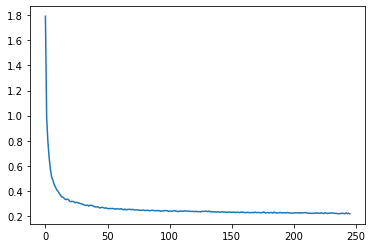

In [8]:
lr = 0.001

y_train = np.reshape(y_train, (-1, 1))
y_test = np.reshape(y_test, (-1, 1))

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
mae_tab= baselineModels.tabnetreg(X_train,y_train,X_test,y_test,batch_size,n_features,n_target,n_epochs, lr)
sb.glue("TabNet MAE",mae_tab)
print("TabNet MAE",mae_tab)